In [ ]:
from utils import clustering_eval
import pandas as pd
import os
from sentence_transformers import SentenceTransformer
from ast import literal_eval
from pprint import pprint

df = pd.read_csv(os.path.abspath("benchmark\\andreescu-andrica-problems-on-number-theory\\benchmark_v1.csv"))
df["Problem&Solution"] = df["Problem&Solution"].apply(literal_eval)
df = df.explode(column=["Problem&Solution"]).reset_index().rename(columns={"index": 'label'})
df = df[["label", "Problem&Solution"]].rename(columns={"Problem&Solution": 'text'})

sample_models = 30

In [5]:
from random import uniform
from pprint import pprint

def test_model(model):
    thresholds = [uniform(0.0, 1.0) for _ in range(sample_models)]
    best_score = None
    best_threshold = None
    best_clusters = None
    best_fig = None
    best_metrics_d = None
    for threshold in thresholds:
        clusters, fig, metrics_d = clustering_eval(df, model, min_community_size=1, threshold=threshold, log=False)
        m = metrics_d['adjusted random score']
        if not best_score or m > best_score:
            best_clusters = clusters
            best_fig = fig
            best_metrics_d = metrics_d
            best_score = m
            best_threshold = threshold
    pprint(f"Best Threshold: {best_threshold};\nBest scores: {best_metrics_d};\nBest clusters: {best_clusters}")
    best_fig.show()

    return best_clusters, best_fig, best_metrics_d, best_threshold

## Baseline (out of the box model)

In [8]:
model = SentenceTransformer("all-MiniLM-L6-v2")
oob_res = test_model(model)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

('Best Threshold: 0.6105674249657815;\n'
 "Best scores: {'random score': 0.9673656163113994, 'adjusted random score': "
 '0.08684651735413954};\n'
 'Best clusters: [[61, 273, 366, 275, 143, 199, 367, 276, 255, 285, 263, 286, '
 '409, 284, 104, 340, 407, 281, 4, 271, 365, 280, 158, 371], [75, 85, 324, 68, '
 '338, 326, 327, 387, 333, 157, 66, 183, 163, 181, 313], [152, 386, 381, 385, '
 '337, 83, 62, 43, 390, 243, 58, 394, 389, 80], [408, 267, 277, 154, 150, 411, '
 '160, 102, 155, 303], [237, 232, 229, 231, 230, 247, 25, 248, 32, 236], [3, '
 '259, 6, 260, 362, 218, 412], [220, 388, 212, 391, 258, 151, 222], [98, 312, '
 '45, 164, 138, 167, 180], [325, 342, 202, 318, 335, 37, 341], [21, 19, 17, '
 '18, 22, 20, 24], [36, 35, 34, 33, 28, 31, 29], [134, 215, 304, 42, 321, '
 '339], [84, 168, 65, 79, 179, 265], [402, 375, 382, 320, 331, 374], [86, 184, '
 '175, 177, 81, 302], [119, 227, 47, 118, 113], [355, 361, 343, 354, 348], '
 '[161, 140, 26, 299, 30], [87, 95, 88, 108, 90], [357, 194,

# Unsupervised methods

## Trained with TSDAE

In [11]:
model = SentenceTransformer("models/tsdae-model")
tsdae_res = test_model(model)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

('Best Threshold: 0.9798354447502992;\n'
 "Best scores: {'random score': 0.9269578313253012, 'adjusted random score': "
 '0.0355600202043314};\n'
 'Best clusters: [[260, 255, 291, 62, 370, 412, 29, 52, 26, 292, 83, 385, 206, '
 '393, 258, 173, 398, 172, 272, 411, 112, 337, 394, 297, 152, 351, 364, 323, '
 '131, 405, 387, 390, 392, 263, 268, 218, 204, 360, 60, 22, 43, 49, 380, 257, '
 '331, 207, 379, 5, 254, 305, 396, 270, 274, 171, 386, 66, 384, 61, 365, 283, '
 '383, 208, 46, 397, 161, 220, 159, 399, 6, 182, 213, 275, 362, 128, 226], '
 '[285, 113, 48, 142, 203, 227, 153, 149, 205, 215, 407, 105, 136, 99, 115, '
 '202, 317, 125, 286, 147, 340, 261, 114, 109, 123, 335, 377, 288, 98, 42, '
 '103, 299, 116, 408, 104, 102, 199, 276, 86, 309, 118, 342, 259, 367, 221, '
 '330, 329, 194], [409, 85, 177, 366, 373, 371, 155, 267, 75, 266, 256, 59, '
 '289, 361, 71, 183, 72, 313, 169], [328, 58, 334, 338, 41, 403, 107, 402, 47, '
 '341, 406, 74, 376, 395, 304], [151, 391, 44, 388, 57, 175, 389,

In [30]:
import numpy as np
def plot_res(results):
    baseline = oob_res[2]
    results['baseline'] = baseline
    fig, ax = plt.subplots(layout='constrained')
    nr_metrics = 0
    for i in results:
        nr_metrics = len(results[i].keys())
        metrics_names = results[i].keys()
        break

    width = 0.25
    x = np.arange(nr_metrics)
    multiplier = 0

    for method, metrics in results.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, list(metrics.values()), width=width, label=method)
        ax.bar_label(rects, padding=3)  
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score')
    ax.set_title('Metrics on clustering task benchmarkv1')
    ax.set_xticks(x + width, metrics_names)
    ax.legend(loc='upper left', ncols=3)

    plt.show()

## Trained with SimCSE

In [32]:
model = SentenceTransformer("models/simcse-model")
simcse_res = test_model(model)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

('Best Threshold: 0.9953268251946226;\n'
 "Best scores: {'random score': 0.9625926784059314, 'adjusted random score': "
 '0.026858044390481724};\n'
 'Best clusters: [[149, 94, 88, 41, 99, 102, 364, 103, 105, 330, 14, 169, 124, '
 '104, 227, 252, 126, 93, 95, 203, 98, 354, 52, 120, 133, 217, 100, 108], '
 '[325, 357, 10, 279, 150, 160, 155, 286, 362, 142, 48, 403, 136, 287, 371, '
 '263, 277, 9, 38, 214], [405, 391, 60, 390, 402, 396, 395, 370, 6, 392, 399, '
 '291, 62, 220, 384, 352, 212, 109], [378, 49, 415, 355, 404, 408, 184, 271, '
 '261, 410, 43, 107, 365, 61, 158, 47, 360], [1, 228, 33, 344, 145, 2, 346, '
 '244, 284, 273, 289], [195, 144, 288, 275, 197, 154, 329, 85, 50, 219], [13, '
 '293, 225, 303, 246, 278, 268, 236, 240, 353], [232, 25, 230, 314, 36, 257], '
 '[188, 4, 46, 336, 259], [172, 114, 56, 171, 28], [376, 53, 401, 397, 381], '
 '[159, 255, 292, 5], [266, 409, 377, 363], [66, 132, 375, 387], [198, 15, '
 '348, 258], [147, 213, 74, 82], [237, 345, 242, 231], [256, 32,

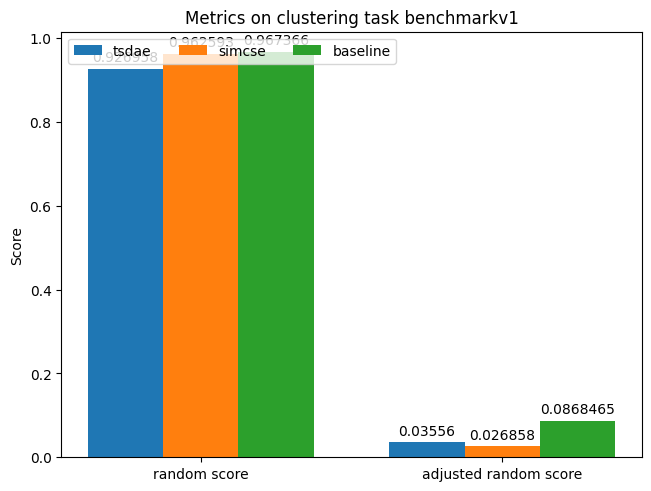

In [33]:
plot_res({"tsdae": tsdae_res[2], "simcse": simcse_res[2]})

Apparently all unsupervised methods perform poorly because of domain specific words and symbols.

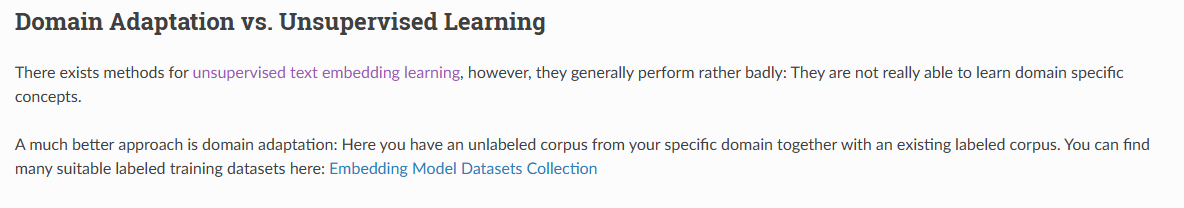